In [1]:
!unzip /content/drive/MyDrive/DL_Project/data.zip -d /content/

Streaming output truncated to the last 5000 lines.
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/1913.png  
  inflating: /content/content/drive/MyDrive/DL_Project/data/test/test/6285.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/7312.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/12576.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/12076.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/12493.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/3335.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/12122.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/946.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/9728.png  
 extracting: /content/content/drive/MyDrive/DL_Project/data/test/test/3437.png  
 extracting: /content/content/drive/MyDrive/DL_Project/

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import models, transforms

In [3]:
df = pd.read_csv("/content/content/drive/MyDrive/DL_Project/data/train/train.csv")
display(df)

,filename,len,num1,bbox1,num2,bbox2,num3,bbox3,num4,bbox4,num5,bbox5,num6,bbox6
0,/content/drive/MyDrive/DL_Project/data/train/t...,2,1,"(246, 77, 81, 219)",9.0,"(323, 81, 96, 219)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
1,/content/drive/MyDrive/DL_Project/data/train/t...,2,2,"(77, 29, 23, 32)",3.0,"(98, 25, 26, 32)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
2,/content/drive/MyDrive/DL_Project/data/train/t...,2,2,"(17, 5, 8, 15)",5.0,"(25, 5, 9, 15)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
3,/content/drive/MyDrive/DL_Project/data/train/t...,2,9,"(57, 13, 15, 34)",3.0,"(72, 13, 13, 34)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
4,/content/drive/MyDrive/DL_Project/data/train/t...,2,3,"(52, 7, 21, 46)",1.0,"(74, 10, 15, 46)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33397,/content/drive/MyDrive/DL_Project/data/train/t...,1,8,"(np.float64(65.0), np.float64(18.0), np.float6...",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
33398,/content/drive/MyDrive/DL_Project/data/train/t...,1,8,"(np.float64(81.0), np.float64(18.0), np.float6...",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
33399,/content/drive/MyDrive/DL_Project/data/train/t...,2,9,"(36, 3, 25, 45)",5.0,"(57, 3, 27, 45)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1
33400,/content/drive/MyDrive/DL_Project/data/train/t...,2,2,"(34, 6, 25, 40)",2.0,"(61, 4, 25, 40)",-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1


In [4]:
df = pd.read_csv('/content/content/drive/MyDrive/DL_Project/data/train/train.csv')

#validation set size = 20%
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the new datasets
train_df.to_csv('/content/content/drive/MyDrive/DL_Project/data/train/train_split.csv', index=False)
val_df.to_csv('/content/content/drive/MyDrive/DL_Project/data/train/val_split.csv', index=False)

In [5]:
pd.set_option('future.no_silent_downcasting', True)

In [10]:
class HouseNumberDataset(Dataset):
    def __init__(self, csv_file, original_root="/content/drive/MyDrive/DL_Project/data", new_root="/content/content/drive/MyDrive/DL_Project/data", transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.original_root = original_root
        self.new_root = new_root

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        img_path = row['filename'].replace(self.original_root, self.new_root)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform:
            image = self.transform(image)
        else:
            image = cv2.resize(image, (224, 224))
            image = torch.tensor(image.transpose((2, 0, 1)) / 255.0, dtype=torch.float32)

        label_cols = [f'num{i}' for i in range(1, 6)]
        labels = row[label_cols].fillna(-1).astype(int).values
        labels = np.where(labels == -1, 10, labels)

        return image, torch.tensor(labels, dtype=torch.long)

In [11]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [12]:
train_csv = "/content/content/drive/MyDrive/DL_Project/data/train/train_split.csv"
val_csv = "/content/content/drive/MyDrive/DL_Project/data/train/val_split.csv"
test_csv = "/content/content/drive/MyDrive/DL_Project/data/test/test.csv"

In [13]:
train_dataset = HouseNumberDataset(train_csv, transform=transform)
val_dataset = HouseNumberDataset(val_csv, transform=transform)
test_dataset = HouseNumberDataset(test_csv, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [14]:
class ResNetMultiDigit(nn.Module):
    def __init__(self, num_digits=5, num_classes=11):
        super().__init__()
        self.backbone = models.resnet18(pretrained=True)
        self.backbone.fc = nn.Identity()
        self.digit_classifiers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(256, num_classes)
            ) for _ in range(num_digits)
        ])

    def forward(self, x):
        features = self.backbone(x)
        return torch.stack([head(features) for head in self.digit_classifiers], dim=1)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNetMultiDigit().to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 112MB/s] 


In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()

In [19]:
train_losses, val_losses = [], []

def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = sum(criterion(outputs[:, i, :], labels[:, i]) for i in range(labels.size(1)))
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss = sum(criterion(outputs[:, i, :], labels[:, i]) for i in range(labels.size(1)))
                total_val_loss += val_loss.item()

        train_losses.append(total_train_loss)
        val_losses.append(total_val_loss)
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_train_loss:.4f}, Val Loss: {total_val_loss:.4f}")

train_model(model, train_loader, val_loader, optimizer, criterion, epochs=20)

100%|██████████| 418/418 [02:26<00:00,  2.85it/s]


Epoch 1/20 - Train Loss: 1237.6696, Val Loss: 221.9251


100%|██████████| 418/418 [02:29<00:00,  2.79it/s]


Epoch 2/20 - Train Loss: 680.8771, Val Loss: 175.4682


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 3/20 - Train Loss: 508.7898, Val Loss: 167.4262


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 4/20 - Train Loss: 397.2470, Val Loss: 182.0474


100%|██████████| 418/418 [02:26<00:00,  2.86it/s]


Epoch 5/20 - Train Loss: 318.3420, Val Loss: 144.0104


100%|██████████| 418/418 [02:26<00:00,  2.86it/s]


Epoch 6/20 - Train Loss: 239.9574, Val Loss: 153.0692


100%|██████████| 418/418 [02:26<00:00,  2.86it/s]


Epoch 7/20 - Train Loss: 191.8555, Val Loss: 154.8734


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 8/20 - Train Loss: 147.2675, Val Loss: 179.3785


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 9/20 - Train Loss: 121.6449, Val Loss: 179.2958


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 10/20 - Train Loss: 100.3785, Val Loss: 191.5033


100%|██████████| 418/418 [02:26<00:00,  2.86it/s]


Epoch 11/20 - Train Loss: 90.2506, Val Loss: 187.0830


100%|██████████| 418/418 [02:25<00:00,  2.86it/s]


Epoch 12/20 - Train Loss: 78.7145, Val Loss: 218.1026


100%|██████████| 418/418 [02:25<00:00,  2.86it/s]


Epoch 13/20 - Train Loss: 70.3064, Val Loss: 218.1280


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 14/20 - Train Loss: 66.1689, Val Loss: 201.2238


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 15/20 - Train Loss: 62.5097, Val Loss: 216.4490


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 16/20 - Train Loss: 47.9507, Val Loss: 214.1014


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 17/20 - Train Loss: 52.4878, Val Loss: 208.7269


100%|██████████| 418/418 [02:25<00:00,  2.88it/s]


Epoch 18/20 - Train Loss: 48.4473, Val Loss: 227.8546


100%|██████████| 418/418 [02:25<00:00,  2.88it/s]


Epoch 19/20 - Train Loss: 48.3002, Val Loss: 218.0821


100%|██████████| 418/418 [02:25<00:00,  2.87it/s]


Epoch 20/20 - Train Loss: 41.6490, Val Loss: 221.1749


In [20]:
def evaluate_model(model, loader, criterion):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = sum(criterion(outputs[:, i, :], labels[:, i]) for i in range(labels.size(1)))
            total_loss += loss.item()
            preds = outputs.argmax(dim=2)
            correct += (preds == labels).sum().item()
            total += labels.numel()

    print(f"Test Loss: {total_loss:.4f}, Accuracy: {correct / total:.4f}")

evaluate_model(model, test_loader, criterion)

Test Loss: 712.1420, Accuracy: 0.8633


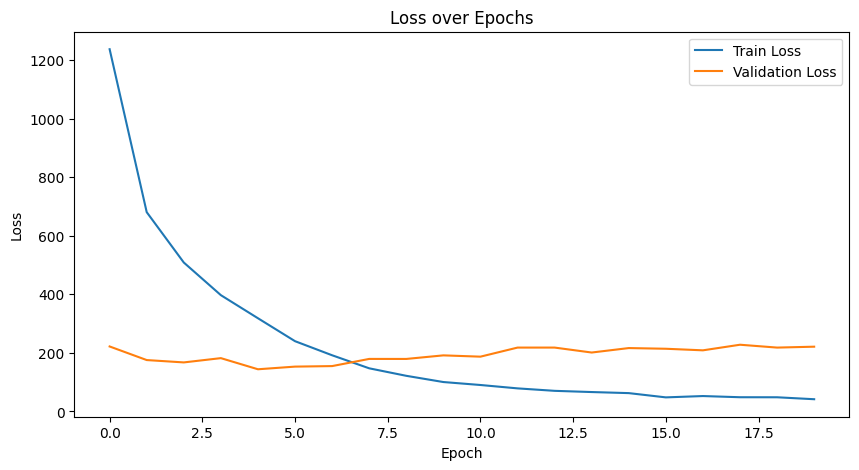

In [21]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()